In [1]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where

import pandas as pd
import numpy as np

from imblearn.under_sampling import NearMiss
import os
from tensorflow.keras.utils import Sequence



import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
import itertools


import shutil
import random
import glob
import matplotlib.pyplot as plt

import tensorflow as tf
keras = tf.compat.v2.keras
Sequence = keras.utils.Sequence





In [2]:
data = pd.read_csv("bankruptcy_data.csv",sep=",")
data.head()

,Data Year - Fiscal,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1979,0.98,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,NaN,NaN,NaN,0
1,1980,0.98,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126,0.014,0.040,0
2,1981,0.87,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368,0.328,0.567,0
3,1982,1.13,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.021,-0.119,-0.096,0
4,1983,1.26,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233,0.147,0.053,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92872 entries, 0 to 92871
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Data Year - Fiscal  92872 non-null  int64  
 1   Tobin's Q           92620 non-null  float64
 2   EPS                 92867 non-null  float64
 3   Liquidity           92625 non-null  float64
 4   Profitability       92625 non-null  float64
 5   Productivity        92625 non-null  float64
 6   Leverage Ratio      92846 non-null  float64
 7   Asset Turnover      92625 non-null  float64
 8   Operational Margin  87315 non-null  float64
 9   Return on Equity    92864 non-null  float64
 10  Market Book Ratio   92815 non-null  float64
 11  Assets Growth       86171 non-null  float64
 12  Sales Growth        86171 non-null  float64
 13  Employee Growth     85862 non-null  float64
 14  BK                  92872 non-null  int64  
dtypes: float64(13), int64(2)
memory usage: 10.6 MB


In [4]:
data.isnull().values.any()

True

In [5]:
np.nan_to_num(data)

array([[ 1.979e+03,  9.800e-01,  1.580e+00, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       [ 1.980e+03,  9.800e-01,  1.410e+00, ...,  1.400e-02,  4.000e-02,
         0.000e+00],
       [ 1.981e+03,  8.700e-01,  3.100e-01, ...,  3.280e-01,  5.670e-01,
         0.000e+00],
       ...,
       [ 2.011e+03,  9.240e-01, -1.600e-02, ..., -2.000e-02, -1.050e-01,
         0.000e+00],
       [ 2.012e+03,  7.880e-01, -1.330e-01, ..., -1.710e-01, -5.900e-02,
         0.000e+00],
       [ 2.013e+03,  8.850e-01, -6.480e-01, ...,  6.500e-02,  6.300e-02,
         1.000e+00]])

In [6]:
data.isnull().values.any()

True

In [7]:
data.isnull().head()

,Data Year - Fiscal,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isnull().sum()

Data Year - Fiscal       0
Tobin's Q              252
EPS                      5
Liquidity              247
Profitability          247
Productivity           247
Leverage Ratio          26
Asset Turnover         247
Operational Margin    5557
Return on Equity         8
Market Book Ratio       57
Assets Growth         6701
Sales Growth          6701
Employee Growth       7010
BK                       0
dtype: int64

In [9]:
data.dropna(how='any').shape

(81204, 15)

In [10]:
data.isnull().values.any()

True

In [11]:
# fill missingdata values with mean column values
data.fillna(data.mean(), inplace=True)

In [12]:
# count the number of NaN values in each column
print(data.isnull().sum())

Data Year - Fiscal    0
Tobin's Q             0
EPS                   0
Liquidity             0
Profitability         0
Productivity          0
Leverage Ratio        0
Asset Turnover        0
Operational Margin    0
Return on Equity      0
Market Book Ratio     0
Assets Growth         0
Sales Growth          0
Employee Growth       0
BK                    0
dtype: int64


In [13]:
data.isnull().values.any()

False

In [14]:
data.shape

(92872, 15)

In [15]:
training = data[0:90000]
testing = data[90000:]

In [16]:
print(training.shape)
print(testing.shape)

(90000, 15)
(2872, 15)


In [17]:
#Create independent and Dependent Features
columns = training.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "BK"
# Define a random state 
state = np.random.RandomState(42)
X = training[columns]
Y = training[target]
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(90000, 15)
(90000,)


In [18]:
#Create independent and Dependent Features
columns = testing.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "BK"
# Define a random state 
state = np.random.RandomState(42)
XT = testing[columns]
YT = testing[target]
# Print the shapes of X & Y
print(XT.shape)
print(YT.shape)

(2872, 15)
(2872,)


Text(0.5, 0, 'BK')

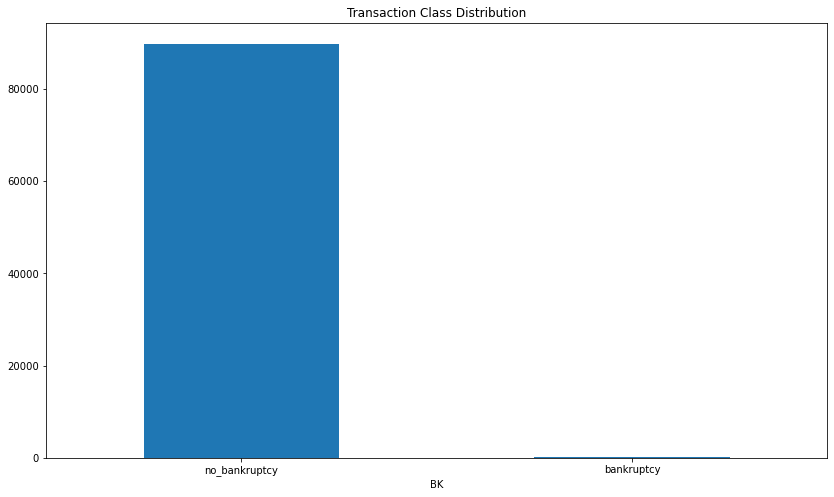

In [19]:
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["no_bankruptcy", "bankruptcy"]


count_classes = pd.value_counts(training['BK'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("BK")


In [20]:
# summarize class distribution
counter = Counter(Y)
print(counter)

Counter({0: 89842, 1: 158})


In [21]:
## RandomOverSampler to handle imbalanced data

from imblearn.over_sampling import RandomOverSampler

In [22]:
os =  RandomOverSampler()
X_train_res, y_train_res = os.fit_sample(X, Y)

In [23]:
X_train_res.shape,y_train_res.shape

((179684, 15), (179684,))

In [24]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 89842, 1: 158})
Resampled dataset shape Counter({0: 89842, 1: 89842})


In [25]:
train_x = np.asarray(X_train_res)
train_y = np.asarray(y_train_res)
test_x = np.asarray(XT)
test_y = np.asarray(YT)

In [26]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(15,)),
    Dense(10, activation='softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                512       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 842
Trainable params: 842
Non-trainable params: 0
_________________________________________________________________


In [27]:
from tensorflow.keras.optimizers import Adam


model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
model.fit(x= train_x, y= train_y, validation_split=0.01, batch_size=10, epochs=30, shuffle=True, verbose=2)

Train on 177887 samples, validate on 1797 samples
Epoch 1/30
177887/177887 - 26s - loss: 37.7009 - accuracy: 0.8537 - val_loss: 0.2751 - val_accuracy: 0.9254
Epoch 2/30
177887/177887 - 28s - loss: 0.4963 - accuracy: 0.9846 - val_loss: 0.0064 - val_accuracy: 1.0000
Epoch 3/30
177887/177887 - 28s - loss: 0.2464 - accuracy: 0.9961 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 4/30
177887/177887 - 28s - loss: 0.1538 - accuracy: 0.9981 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 5/30
177887/177887 - 28s - loss: 0.1731 - accuracy: 0.9984 - val_loss: 8.5396e-04 - val_accuracy: 1.0000
Epoch 6/30
177887/177887 - 27s - loss: 0.1339 - accuracy: 0.9985 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 7/30
177887/177887 - 27s - loss: 0.1495 - accuracy: 0.9987 - val_loss: 2.6565e-04 - val_accuracy: 1.0000
Epoch 8/30
177887/177887 - 27s - loss: 0.1646 - accuracy: 0.9990 - val_loss: 1.5924e-04 - val_accuracy: 1.0000
Epoch 9/30
177887/177887 - 27s - loss: 0.1164 - accuracy: 0.9989 - val_loss: 1.61

In [45]:
model.evaluate(
    test_x, 
    test_y, 
    batch_size=32, 
    verbose=1, 
    sample_weight=None)

2872/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.9574453719257743, 0.99199164]

In [46]:
predictions =model.predict(
    test_x, 
    batch_size=32, 
    verbose=1)
predictions 

2872/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

array([[9.9999964e-01, 3.2430231e-07, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [9.9999976e-01, 2.8605612e-07, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [9.9999964e-01, 3.0119639e-07, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.0000000e+00, 1.4790849e-20, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [9.9999988e-01, 1.2399616e-07, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.1506826e-05, 9.9998844e-01, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [47]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [48]:

for i in rounded_predictions:
    print(i)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
1
0
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
1
0
1
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
1
0
1
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0


In [49]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [50]:
cm = confusion_matrix(y_true= test_y, y_pred= rounded_predictions)

In [51]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm= cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 

Confusion matrix, without normalization
[[2472    0]
 [  23  377]]


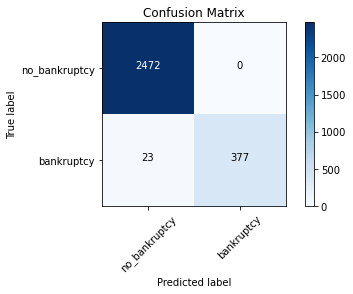

In [52]:
cm_plot_labels = ['no_bankruptcy','bankruptcy']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [53]:
probs = model.predict_proba(test_x)

In [54]:
from sklearn.metrics import roc_curve

from sklearn.metrics import auc



malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(YT, malignant_probs)
roc_auc = auc(fpr, tpr)

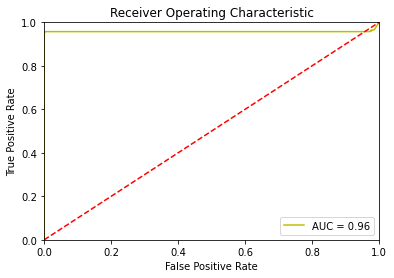

In [55]:
from sklearn.ensemble import RandomForestClassifier

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [57]:
accuracy_score(test_y, rounded_predictions)

0.991991643454039

In [58]:
from sklearn.metrics import f1_score


f1_score(test_y, rounded_predictions, average='macro')

0.9828842043458512

In [59]:
from sklearn.metrics import precision_score


precision_score(test_y, rounded_predictions, average='macro' )


0.9953907815631262

In [60]:
from sklearn.metrics import recall_score

recall_score(test_y, rounded_predictions,average='macro' )

0.97125

In [56]:
y_pred = model.predict(test_x)

In [42]:
y_pred = y_pred.astype('int64')
test_y = test_y.astype('int64')

In [43]:
from sklearn.metrics import precision_score
 

precision_score(test_y, y_pred)

ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets